In [0]:
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import sklearn
from sklearn.model_selection import train_test_split
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data_utils
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('/content/drive/My Drive/dataset.csv',names = list1)
#df = pd.read_csv('/content/drive/My Drive/annthyroid.csv',names = list1)

In [39]:
df.head()

,A,B,C,D,E,F,Label
0,0.73,0.00060,0.015,0.120,0.082,0.146,0
1,0.24,0.00025,0.030,0.143,0.133,0.108,0
2,0.47,0.00190,0.024,0.102,0.131,0.078,0
3,0.64,0.00090,0.017,0.077,0.090,0.085,0
4,0.23,0.00025,0.026,0.139,0.090,0.153,0


In [0]:
list1 = ['A','B','C','D','E','F','Label']

In [0]:
df.columns = list1

In [42]:
df.head()

,A,B,C,D,E,F,Label
0,0.73,0.00060,0.015,0.120,0.082,0.146,0
1,0.24,0.00025,0.030,0.143,0.133,0.108,0
2,0.47,0.00190,0.024,0.102,0.131,0.078,0
3,0.64,0.00090,0.017,0.077,0.090,0.085,0
4,0.23,0.00025,0.026,0.139,0.090,0.153,0


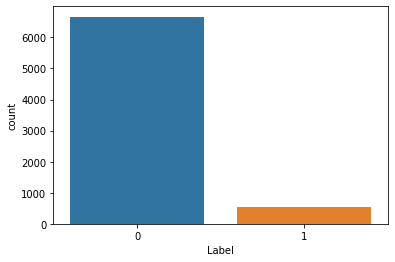

In [43]:
sns.countplot(x='Label',data=df)

In [0]:
df1 = df[['A','B','C','D','E','F']]

In [45]:
df1

,A,B,C,D,E,F
0,0.73,0.00060,0.0150,0.120,0.082,0.1460
1,0.24,0.00025,0.0300,0.143,0.133,0.1080
2,0.47,0.00190,0.0240,0.102,0.131,0.0780
3,0.64,0.00090,0.0170,0.077,0.090,0.0850
4,0.23,0.00025,0.0260,0.139,0.090,0.1530
...,...,...,...,...,...,...
7195,0.59,0.00250,0.0208,0.079,0.099,0.0800
7196,0.51,0.10600,0.0060,0.005,0.089,0.0055
7197,0.51,0.00076,0.0201,0.090,0.067,0.1340
7198,0.35,0.00280,0.0201,0.090,0.089,0.1010


In [0]:
df1 = df.iloc[:,0:6]

In [47]:
df1.head()

,A,B,C,D,E,F
0,0.73,0.00060,0.015,0.120,0.082,0.146
1,0.24,0.00025,0.030,0.143,0.133,0.108
2,0.47,0.00190,0.024,0.102,0.131,0.078
3,0.64,0.00090,0.017,0.077,0.090,0.085
4,0.23,0.00025,0.026,0.139,0.090,0.153


In [0]:
df2 = df.iloc[:,6]

In [49]:
df2.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

In [0]:
#train_input,test_input = train_test_split(df1,test_size = 0.5)
#train_labels,test_labels = train_test_split(df2,test_size = 0.5)

train, test = train_test_split(df, test_size=0.02)
train_labels = train.iloc[:, 6]
train_input = train.iloc[:, :6]
test_labels = test.iloc[:, 6]
test_input = test.iloc[:, :6]

In [51]:
len(test_labels)

144

In [0]:
# normalisation column-wise

In [0]:
def normalize(x):
  x_normed = x/x.max(0,keepdim=True)[0]
  return x_normed

In [0]:
train = torch.tensor(train_input.values.astype(np.float32))
train_target = torch.tensor(train_labels.values.astype(np.float32))

train = normalize(train)

train_dataset = data_utils.TensorDataset(train,train_target)
train_loader = data_utils.DataLoader(dataset= train_dataset , batch_size = 64, shuffle = True)

In [0]:
test = torch.tensor(test_input.values.astype(np.float32))
test_target = torch.tensor(test_labels.values.astype(np.float32))

test_dataset = data_utils.TensorDataset(test,test_target)
test_loader = data_utils.DataLoader(dataset = test_dataset,batch_size =1, shuffle= False)



In [0]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(6,24)
    self.fc2 = nn.Linear(24,32)
    self.fc3 = nn.Linear(32,1)
    
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(p=0.1)
    self.batchnorm1 = nn.BatchNorm1d(24)
    self.batchnorm2 = nn.BatchNorm1d(32)

    # define forward loop
  def forward(self, inputs):
    x = self.relu(self.fc1(inputs))
    x = self.batchnorm1(x)
    x = self.relu(self.fc2(x))
    x = self.batchnorm2(x)
    x = self.dropout(x)
    x = self.fc3(x)

    return x

     

In [57]:
model = Net()
print(model)
Loss_function = nn.BCEWithLogitsLoss()
Optimizer_with_Regularization_Function = optim.Adam(model.parameters(),lr=0.01)

Net(
  (fc1): Linear(in_features=6, out_features=24, bias=True)
  (fc2): Linear(in_features=24, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [0]:
def binary_acc(y_pred,y_batch):
  y_pred_rounded = torch.round(torch.sigmoid(y_pred))


  correct_result_sum = (y_pred_rounded == y_batch).sum().float()
  acc = correct_result_sum / y_batch.shape[0]
  acc = torch.round(100* acc)
   
  return acc


In [59]:
model.train()
epochs = 20
for i in range(1,epochs+1):
  epochs_loss = 0
  epochs_acc = 0
  for x_batch,y_batch in train_loader:
    Optimizer_with_Regularization_Function.zero_grad()

    y_pred = model(x_batch)

    #print(y_pred.size())
    #print(y_batch.size())
    
    loss = Loss_function(y_pred,y_batch.unsqueeze(1))
    acc = binary_acc(y_pred,y_batch.unsqueeze(1))

    #backpropagation
    loss.backward()
    Optimizer_with_Regularization_Function.step() # 1 time updation
    
    epochs_loss += loss.item()
    epochs_acc += acc.item()


  print(f'Epoch {i}: | Loss: {epochs_loss/len(train_loader): .5f} | Acc: {epochs_acc/len(train_loader): .3f}')

Epoch 1: | Loss:  0.21936 | Acc:  93.108
Epoch 2: | Loss:  0.09763 | Acc:  96.189
Epoch 3: | Loss:  0.09658 | Acc:  96.009
Epoch 4: | Loss:  0.09477 | Acc:  96.036
Epoch 5: | Loss:  0.08855 | Acc:  96.234
Epoch 6: | Loss:  0.08510 | Acc:  96.360
Epoch 7: | Loss:  0.08447 | Acc:  96.135
Epoch 8: | Loss:  0.09953 | Acc:  96.207
Epoch 9: | Loss:  0.09093 | Acc:  96.288
Epoch 10: | Loss:  0.08390 | Acc:  96.081
Epoch 11: | Loss:  0.08213 | Acc:  96.405
Epoch 12: | Loss:  0.07756 | Acc:  96.550
Epoch 13: | Loss:  0.07567 | Acc:  96.486
Epoch 14: | Loss:  0.07602 | Acc:  96.523
Epoch 15: | Loss:  0.07289 | Acc:  96.757
Epoch 16: | Loss:  0.07437 | Acc:  96.739
Epoch 17: | Loss:  0.07270 | Acc:  96.568
Epoch 18: | Loss:  0.07475 | Acc:  96.414
Epoch 19: | Loss:  0.07204 | Acc:  96.550
Epoch 20: | Loss:  0.07128 | Acc:  96.667


In [0]:
model.eval()

y_pred_list = []
y_correct_list = []

with torch.no_grad():
  for x_batch,y_batch in test_loader:
    y_pred = model(x_batch)
    y_pred = torch.sigmoid(y_pred)
    y_pred_list.append(y_pred.cpu().numpy())
    y_correct_list.append(y_batch.numpy())   #numpy arrays will be formed,will convert arrays into list


y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
y_correct_list = [a.squeeze().tolist() for a in y_correct_list]


In [0]:
y_pred_ana = []
y_pred_non = []

len_of_list = len(y_pred_list)

for i in range(0,len_of_list):
  if y_correct_list[i] == 0:
    y_pred_non.append(y_pred_list[i])
  else:
    y_pred_ana.append(y_pred_list[i])

y_pred_non = [i*100 for i in y_pred_non]
y_pred_ana = [i*100 for i in y_pred_ana]


Text(0, 0.5, 'Occurences')

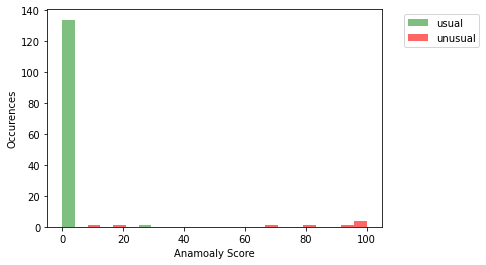

In [62]:
data = y_pred_non
bins = np.linspace(0, 100, 25, endpoint=True)
plt.hist(data,bins,color='green',alpha=0.5,label='usual')

data1 = y_pred_ana
plt.hist(data1,bins,color='red',alpha=0.6,label='unusual')

plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.xlabel('Anamoaly Score')
plt.ylabel('Occurences')

In [63]:
from sklearn.metrics import classification_report

test_labels = np.array(test_labels)
y_pred_list = np.array(y_pred_list)

print(classification_report(test_labels,y_pred_list.round(),target_names = ["Normal","Abnormal"]))

              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99       135
    Abnormal       1.00      0.78      0.88         9

    accuracy                           0.99       144
   macro avg       0.99      0.89      0.93       144
weighted avg       0.99      0.99      0.99       144

